# OCTAM Data Analysis

In [1]:
# import libraries
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import plotly.express as px
from datetime import datetime
import geopandas as gpd
from shapely.geometry import Point

plt.style.use('ggplot')

# Load Data

In [2]:
BY2019_gdf = gpd.read_file('data/BY2019_gdf.shp')

In [17]:
BY2019_gdf = BY2019_gdf.rename(columns={'TOT_COM_LV': 'TOT_VOL', 'ROADWAY_NA': 'ROUTE_NAME'})

In [18]:
BY2019_gdf.head(5)

,ID,TOT_VOL,ROUTE_NAME,geometry
0,1,9955.89390,NaN,"LINESTRING (-119.47533 34.38305, -119.47453 34..."
1,2,787.72525,NaN,"LINESTRING (-119.46459 34.40568, -119.44961 34..."
2,3,44.17409,NaN,"LINESTRING (-119.49493 34.79391, -119.44240 34..."
3,4,101.57717,NaN,"LINESTRING (-119.02344 34.82851, -119.01246 34..."
4,5,12341.93000,NaN,"LINESTRING (-118.88875 34.82567, -118.88213 34..."


In [6]:
postmile_gdf = gpd.read_file('data/postmile_gdf.shp')

In [7]:
postmile_gdf.head(5)

,OBJECTID,ROUTE,ROUTEID,COUNTY,DISTRICT,PMPREFIX,PM,PMSUFFIX,PMC,Lat_WGS84,Long_WGS84,geometry
0,191,1,1_20171231_L,ORA,12,NaN,9.5,NaN,9.5,33.543171,-117.786628,POINT (-117.78663 33.54317)
1,805,1,1_20171231_L,ORA,12,NaN,17.5,NaN,17.5,33.612819,-117.891706,POINT (-117.89171 33.61282)
2,991,1,1_20171231_L,ORA,12,NaN,26.5,NaN,26.5,33.674212,-118.025442,POINT (-118.02544 33.67421)
3,1127,1,1_20171231_L,ORA,12,NaN,30.6,NaN,30.6,33.718914,-118.071566,POINT (-118.07157 33.71891)
4,1602,1,1_20171231_L,ORA,12,NaN,25.5,NaN,25.5,33.664521,-118.012269,POINT (-118.01227 33.66452)


In [12]:
pm_74_gdf = postmile_gdf.loc[postmile_gdf['ROUTE']==74]

In [13]:
pm_74_gdf.head(5)

,OBJECTID,ROUTE,ROUTEID,COUNTY,DISTRICT,PMPREFIX,PM,PMSUFFIX,PMC,Lat_WGS84,Long_WGS84,geometry
576,258722,74,74_20171231_R,ORA,12,NaN,11.3,NaN,11.3,33.580740,-117.529616,POINT (-117.52962 33.58074)
577,258737,74,74_20171231_R,ORA,12,NaN,3.0,NaN,3,33.521904,-117.613456,POINT (-117.61346 33.52190)
578,258809,74,74_20171231_L,ORA,12,NaN,16.4,NaN,16.4,33.600200,-117.460009,POINT (-117.46001 33.60020)
579,258860,74,74_20171231_L,ORA,12,NaN,16.1,NaN,16.1,33.596965,-117.462853,POINT (-117.46285 33.59697)
580,258906,74,74_20171231_L,ORA,12,NaN,15.9,NaN,15.9,33.595096,-117.464463,POINT (-117.46446 33.59510)


In [14]:
pm_74_gdf.to_file('data/pm_74_gdf.shp')

# Read Link Data
## Transfer shapefile to DataFrame with lat and long
## Plot the shapefile within Jupyter

In [11]:
OCTAM_shp = gpd.read_file('data/OCTAM_Links_19BY.shp')

In [17]:
OCTAM_shp.shape

(35959, 157)

In [16]:
OCTAM_shp['ID'].nunique()

35959

In [124]:
BY2019_gdf = OCTAM_shp[['ID', 'TOT_COM_LV', 'ROADWAY_NA', 'geometry']].copy()

In [28]:
# plot the shapefile
# fig, ax = plt.subplots(figsize=(20, 10))
# BY2019_gdf.plot(ax=ax)

In [83]:
postmile_shp = gpd.read_file('data/SHN_Tenth_Postmiles_OC_select.shp')

In [84]:
postmile_shp.columns

Index(['OBJECTID', 'ROUTE', 'RTESUFFIX', 'ROUTES', 'ROUTEID', 'COUNTY',
       'DISTRICT', 'PMPREFIX', 'PM', 'PMSUFFIX', 'PMC', 'ODOMETER',
       'PMINTERVAL', 'HWYSEGMENT', 'ALIGNCODE', 'ROUTETYPE', 'Lat_WGS84',
       'Long_WGS84', 'CoordWGS84', 'geometry'],
      dtype='object')

In [85]:
postmile_shp.shape

(5794, 20)

In [86]:
postmile_shp['OBJECTID'].nunique()

5794

In [87]:
postmile_gdf = postmile_shp[['OBJECTID', 'ROUTE', 'ROUTEID', 'COUNTY', 'DISTRICT', 'PMPREFIX', 'PM', 'PMSUFFIX', 'PMC', 'Lat_WGS84', 'Long_WGS84', 'geometry']].copy()

In [42]:
BY2019_gdf.head(5)

,ID,TOT_COM_LV,geometry
0,1,9955.89390,"LINESTRING (-119.47533 34.38305, -119.47453 34..."
1,2,787.72525,"LINESTRING (-119.46459 34.40568, -119.44961 34..."
2,3,44.17409,"LINESTRING (-119.49493 34.79391, -119.44240 34..."
3,4,101.57717,"LINESTRING (-119.02344 34.82851, -119.01246 34..."
4,5,12341.93000,"LINESTRING (-118.88875 34.82567, -118.88213 34..."


In [89]:
postmile_gdf.head(5)

,OBJECTID,ROUTE,ROUTEID,COUNTY,DISTRICT,PMPREFIX,PM,PMSUFFIX,PMC,Lat_WGS84,Long_WGS84,geometry
0,191,1,1_20171231_L,ORA,12,NaN,9.5,NaN,9.5,33.543171,-117.786628,POINT (-13111947.418 3967624.731)
1,805,1,1_20171231_L,ORA,12,NaN,17.5,NaN,17.5,33.612819,-117.891706,POINT (-13123644.661 3976930.804)
2,991,1,1_20171231_L,ORA,12,NaN,26.5,NaN,26.5,33.674212,-118.025442,POINT (-13138532.150 3985140.039)
3,1127,1,1_20171231_L,ORA,12,NaN,30.6,NaN,30.6,33.718914,-118.071566,POINT (-13143666.570 3991121.250)
4,1602,1,1_20171231_L,ORA,12,NaN,25.5,NaN,25.5,33.664521,-118.012269,POINT (-13137065.724 3983843.842)


In [90]:
postmile_df = postmile_gdf[['OBJECTID', 'ROUTE', 'ROUTEID', 'COUNTY', 'DISTRICT', 'PMPREFIX', 'PM', 'PMSUFFIX', 'PMC', 'Lat_WGS84', 'Long_WGS84']].copy()

In [91]:
postmile_df.columns

Index(['OBJECTID', 'ROUTE', 'ROUTEID', 'COUNTY', 'DISTRICT', 'PMPREFIX', 'PM',
       'PMSUFFIX', 'PMC', 'Lat_WGS84', 'Long_WGS84'],
      dtype='object')

In [92]:
postmile_df['geometry'] = postmile_df.apply(lambda row: Point(row.Long_WGS84, row.Lat_WGS84), axis=1)

In [93]:
postmile_gdf = gpd.GeoDataFrame(postmile_df, geometry='geometry')

In [94]:
postmile_gdf.crs = 'EPSG:4019'

In [95]:
postmile_gdf.head()

,OBJECTID,ROUTE,ROUTEID,COUNTY,DISTRICT,PMPREFIX,PM,PMSUFFIX,PMC,Lat_WGS84,Long_WGS84,geometry
0,191,1,1_20171231_L,ORA,12,NaN,9.5,NaN,9.5,33.543171,-117.786628,POINT (-117.78663 33.54317)
1,805,1,1_20171231_L,ORA,12,NaN,17.5,NaN,17.5,33.612819,-117.891706,POINT (-117.89171 33.61282)
2,991,1,1_20171231_L,ORA,12,NaN,26.5,NaN,26.5,33.674212,-118.025442,POINT (-118.02544 33.67421)
3,1127,1,1_20171231_L,ORA,12,NaN,30.6,NaN,30.6,33.718914,-118.071566,POINT (-118.07157 33.71891)
4,1602,1,1_20171231_L,ORA,12,NaN,25.5,NaN,25.5,33.664521,-118.012269,POINT (-118.01227 33.66452)


In [96]:
postmile_gdf.to_file('postmile_shapefile.shp', driver='ESRI Shapefile')

In [97]:
postmile_gdf = gpd.read_file('data/postmile_shapefile.shp')

<AxesSubplot: >

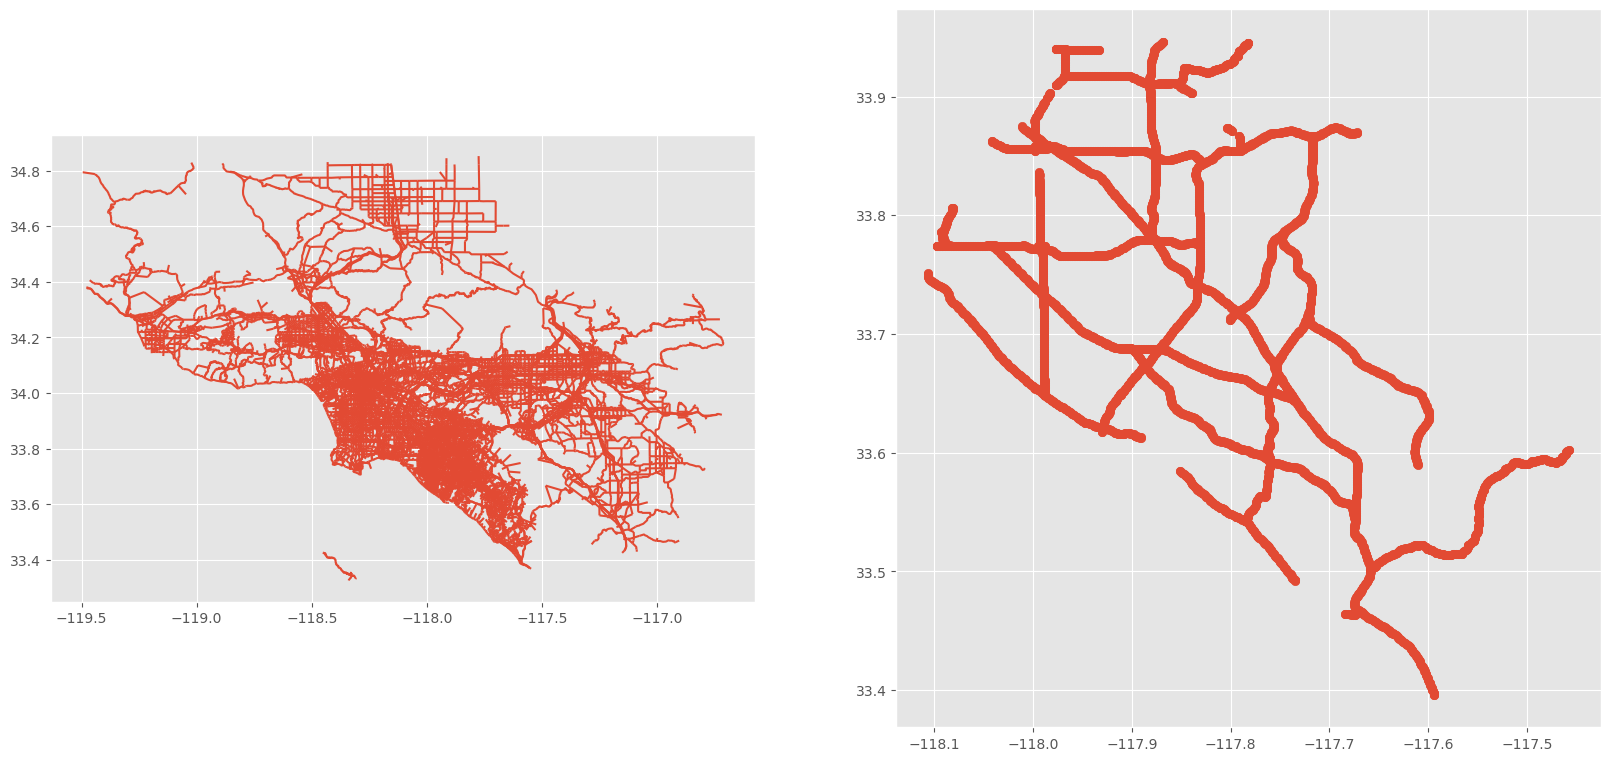

In [98]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
BY2019_gdf.plot(ax=ax1)
postmile_gdf.plot(ax=ax2)

<AxesSubplot: >

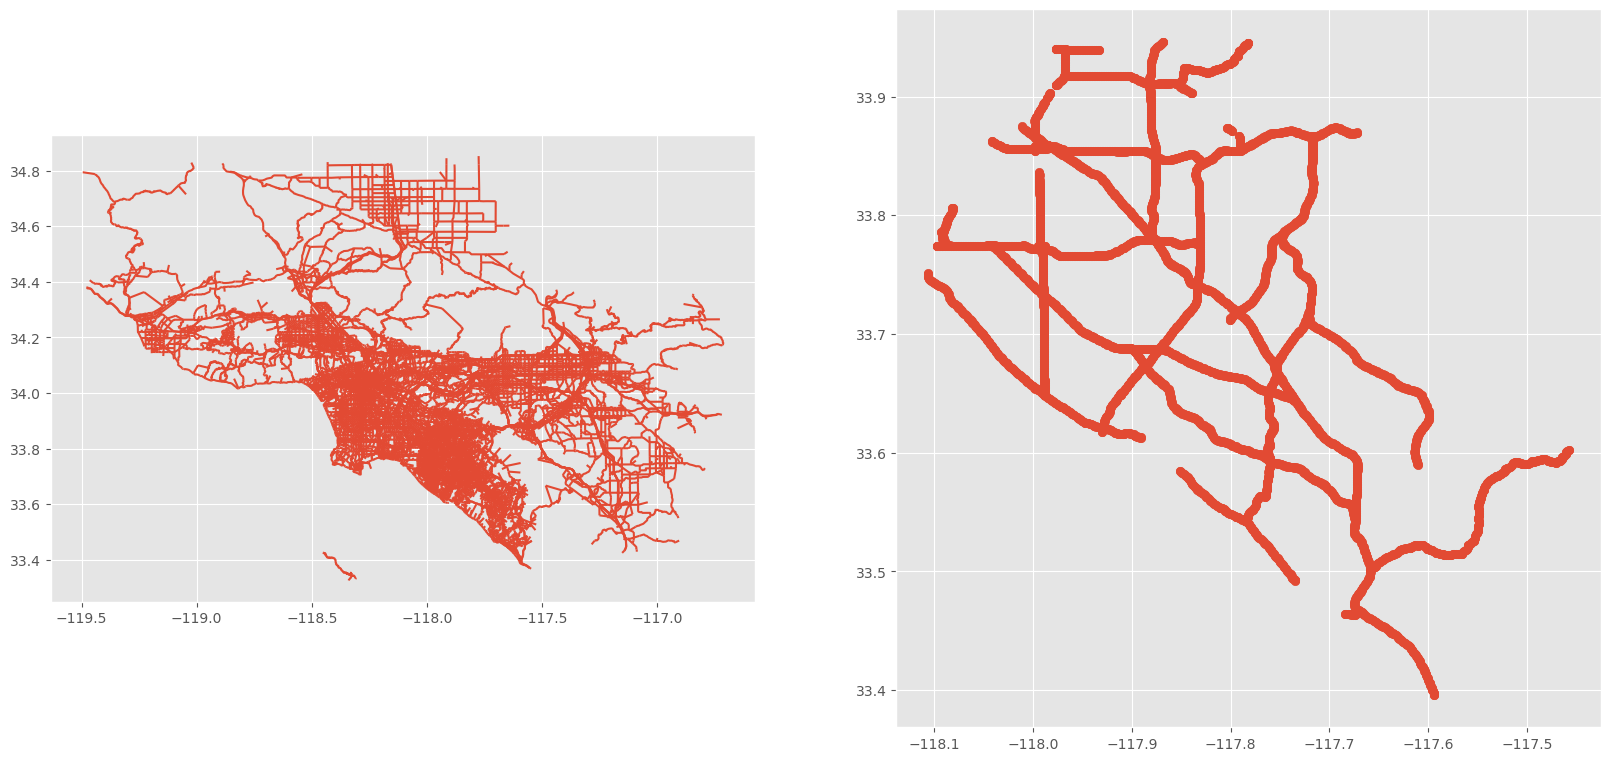

In [99]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
BY2019_gdf.plot(ax=ax1)
postmile_gdf.plot(ax=ax2)

In [125]:
# Save as shapefiles
BY2019_gdf.to_file('data/BY2019_gdf.shp')
postmile_gdf.to_file('data/postmile_gdf.shp')

In [105]:
postmile_gdf

,OBJECTID,ROUTE,ROUTEID,COUNTY,DISTRICT,PMPREFIX,PM,PMSUFFIX,PMC,Lat_WGS84,Long_WGS84,geometry
0,191,1,1_20171231_L,ORA,12,NaN,9.5,NaN,9.5,33.543171,-117.786628,POINT (-117.78663 33.54317)
1,805,1,1_20171231_L,ORA,12,NaN,17.5,NaN,17.5,33.612819,-117.891706,POINT (-117.89171 33.61282)
2,991,1,1_20171231_L,ORA,12,NaN,26.5,NaN,26.5,33.674212,-118.025442,POINT (-118.02544 33.67421)
3,1127,1,1_20171231_L,ORA,12,NaN,30.6,NaN,30.6,33.718914,-118.071566,POINT (-118.07157 33.71891)
4,1602,1,1_20171231_L,ORA,12,NaN,25.5,NaN,25.5,33.664521,-118.012269,POINT (-118.01227 33.66452)
...,...,...,...,...,...,...,...,...,...,...,...,...
5789,293231,91,91_20171231_R,ORA,12,R,2.2,NaN,R2.2,33.855935,-118.005233,POINT (-118.00523 33.85594)
5790,293315,91,91_20171231_R,ORA,12,R,13.6,R,R13.6R,33.868572,-117.758777,POINT (-117.75878 33.86857)
5791,293365,90,90_20171231_R,ORA,12,NaN,7.0,NaN,7,33.911064,-117.856702,POINT (-117.85670 33.91106)
5792,293396,91,91_20171231_R,ORA,12,R,18.6,NaN,R18.6,33.868735,-117.676890,POINT (-117.67689 33.86874)


In [117]:
BY2019_gdf.crs

<Geographic 2D CRS: EPSG:4019>
Name: Unknown datum based upon the GRS 1980 ellipsoid
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Not specified.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: Not specified (based on GRS 1980 ellipsoid)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [118]:
postmile_gdf.crs

<Geographic 2D CRS: EPSG:4019>
Name: Unknown datum based upon the GRS 1980 ellipsoid
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Not specified.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: Not specified (based on GRS 1980 ellipsoid)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [126]:
join = gpd.sjoin_nearest(BY2019_gdf, postmile_gdf)

/Users/yu-jenchen/miniforge3/envs/py4ds/lib/python3.11/site-packages/geopandas/array.py:344: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


<AxesSubplot: >

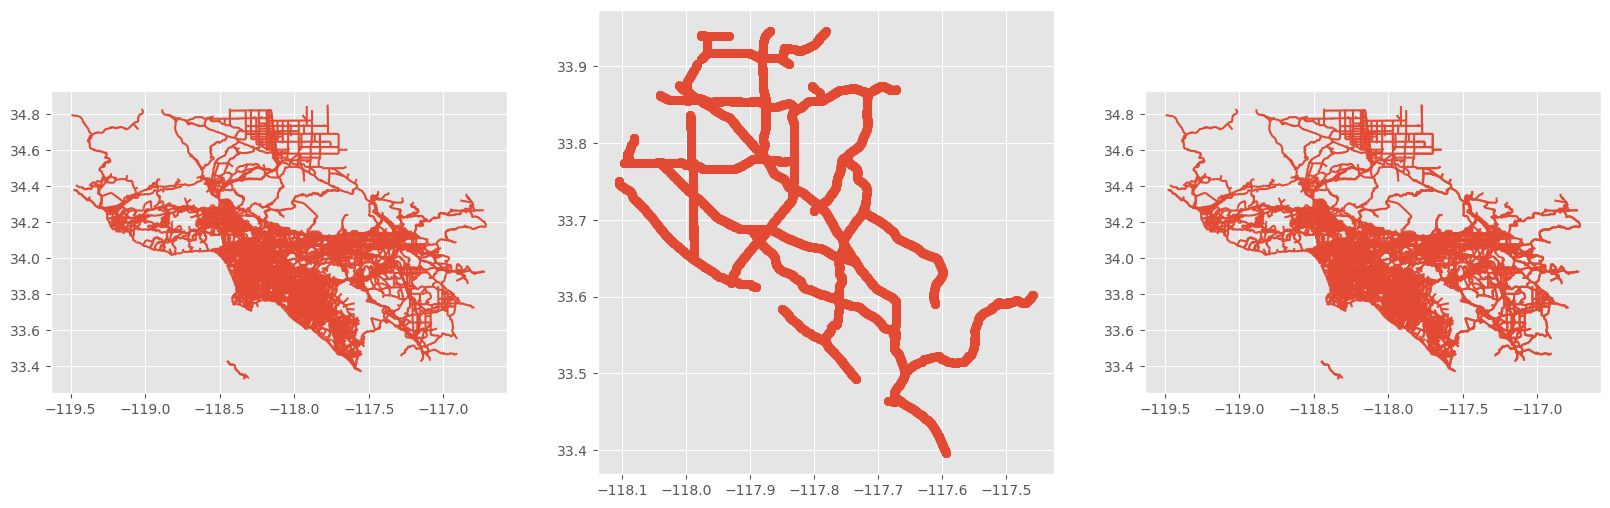

In [120]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 10))
BY2019_gdf.plot(ax=ax1)
postmile_gdf.plot(ax=ax2)
join.plot(ax=ax3)

In [127]:
join

,ID,TOT_COM_LV,ROADWAY_NA,geometry,index_right,OBJECTID,ROUTE,ROUTEID,COUNTY,DISTRICT,PMPREFIX,PM,PMSUFFIX,PMC,Lat_WGS84,Long_WGS84
0,1,9955.893900,NaN,"LINESTRING (-119.47533 34.38305, -119.47453 34...",1749,193174,405,405_20171231_L,ORA,12,NaN,24.177999,NaN,24.178,33.785814,-118.093187
1,2,787.725250,NaN,"LINESTRING (-119.46459 34.40568, -119.44961 34...",1749,193174,405,405_20171231_L,ORA,12,NaN,24.177999,NaN,24.178,33.785814,-118.093187
24,31,5306.328300,NaN,"LINESTRING (-119.27326 34.44300, -119.28615 34...",1749,193174,405,405_20171231_L,ORA,12,NaN,24.177999,NaN,24.178,33.785814,-118.093187
27,35,2089.921100,NaN,"LINESTRING (-119.34187 34.39740, -119.31653 34...",1749,193174,405,405_20171231_L,ORA,12,NaN,24.177999,NaN,24.178,33.785814,-118.093187
28,36,5702.642700,NaN,"LINESTRING (-119.29157 34.41152, -119.29989 34...",1749,193174,405,405_20171231_L,ORA,12,NaN,24.177999,NaN,24.178,33.785814,-118.093187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35328,42174,NaN,LOS PATRONES PKWY,"LINESTRING (-117.59483 33.50214, -117.59512 33...",4240,263716,74,74_20171231_R,ORA,12,NaN,4.500000,NaN,4.5,33.515315,-117.590059
35329,42175,NaN,NaN,"LINESTRING (-117.58827 33.49860, -117.59483 33...",4240,263716,74,74_20171231_R,ORA,12,NaN,4.500000,NaN,4.5,33.515315,-117.590059
35589,42439,NaN,NaN,"LINESTRING (-117.59883 33.39921, -117.59844 33...",379,213810,5,5_20171231_L,ORA,12,NaN,0.600000,NaN,0.6,33.404410,-117.597901
35705,42559,95.397973,"SANTA ANA FRWY, I-5 (HOV)","LINESTRING (-117.99857 33.86670, -117.99883 33...",3152,180433,39,39_20171231_L,ORA,12,NaN,15.100000,NaN,15.1,33.866634,-117.998265


In [122]:
BY2019_gdf.head(5)

,ID,TOT_COM_LV,geometry
0,1,9955.89390,"LINESTRING (-119.47533 34.38305, -119.47453 34..."
1,2,787.72525,"LINESTRING (-119.46459 34.40568, -119.44961 34..."
2,3,44.17409,"LINESTRING (-119.49493 34.79391, -119.44240 34..."
3,4,101.57717,"LINESTRING (-119.02344 34.82851, -119.01246 34..."
4,5,12341.93000,"LINESTRING (-118.88875 34.82567, -118.88213 34..."
